# Лабораторная работа 1: Регрессионный анализ

**Цель:** научиться применять модели линейной регрессии библиотеки scikit-learn к набору эмпирических данных

**Задачи:**
1. Загрузить данные из CSV-файла
2. Визуализировать загруженные данные
3. Разбить данные на обучающую и тестовую выборки
4. Выбрать модель регрессии
5. Обучить модель на обучающих данных
6. Проверить качество модели на тестовых данных
7. Визуализировать результат

Студент: Горщенко Д. В.  
Вариант: 3

### 1. Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


### 2. Загрузка данных из файла

In [2]:
data = pd.read_csv('datasets/lab1-03.csv', header=None);
data.columns = ['X', 'Y']
data.head()

,X,Y
0,4.232323,4674.547950
1,9.000000,-3157.316173
2,7.505051,1837.129451
3,7.060606,3058.979356
4,8.636364,-2190.859521


### 3. Визуализация загруженных данных.

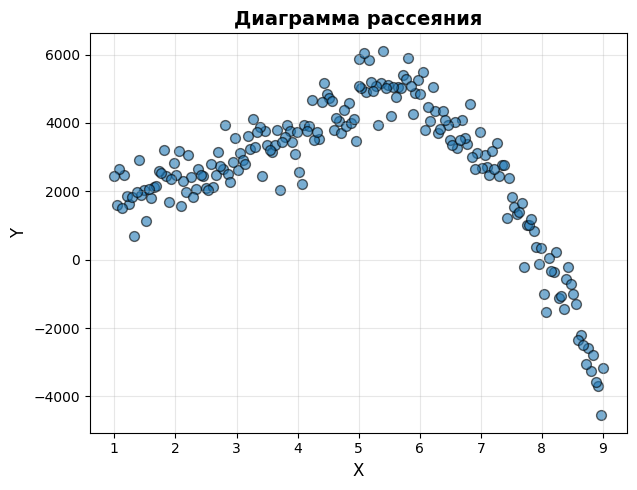

In [3]:
X_column = data.columns[0]
Y_column = data.columns[1]


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(data.iloc[:,0], data.iloc[:,1], alpha=0.6, edgecolors='k', s=50)
plt.xlabel(X_column, fontsize=12)
plt.ylabel(Y_column, fontsize=12)
plt.title('Диаграмма рассеяния', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4. Разбиение данных на обучающую и тестовую выборки

In [4]:
X = data[[X_column]].values
y = data[Y_column].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Размер обучающей выборки: 160
Размер тестовой выборки: 40


### 5. Создание и обучение модели линейной регрессии

In [5]:
model = LinearRegression()

model.fit(X_train, y_train)

a = model.coef_[0]
b = model.intercept_

print(f"\nКоэффициент (наклон): {a:.6f}")
print(f"Свободный член (intercept): {b:.6f}")
print("ЭМПИРИЧЕСКАЯ ФОРМУЛА:")
if b >= 0:
    print(f"y = {a:.6f} * x + {b:.6f}")
else:
    print(f"y = {a:.6f} * x - {abs(b):.6f}")


Коэффициент (наклон): -326.110028
Свободный член (intercept): 4287.438954
ЭМПИРИЧЕСКАЯ ФОРМУЛА:
y = -326.110028 * x + 4287.438954


### 6. Прогнозирование на тестовой выборке

In [6]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


### 7. Оценка качества модели

In [7]:
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("="*60)
print("МЕТРИКИ КАЧЕСТВА МОДЕЛИ")
print("="*60)
print("\nОбучающая выборка:")
print(f"  MSE (средняя квадратичная ошибка): {mse_train:.6f}")
print(f"  RMSE (корень из MSE): {rmse_train:.6f}")
print(f"  MAE (средняя абсолютная ошибка): {mae_train:.6f}")
print(f"  R² (коэффициент детерминации): {r2_train:.6f}")

print("\nТестовая выборка:")
print(f"  MSE (средняя квадратичная ошибка): {mse_test:.6f}")
print(f"  RMSE (корень из MSE): {rmse_test:.6f}")
print(f"  MAE (средняя абсолютная ошибка): {mae_test:.6f}")
print(f"  R² (коэффициент детерминации): {r2_test:.6f}")
print("="*60)

print(f"\nМодель объясняет {r2_test*100:.2f}% вариации данных")

МЕТРИКИ КАЧЕСТВА МОДЕЛИ

Обучающая выборка:
  MSE (средняя квадратичная ошибка): 3604067.241972
  RMSE (корень из MSE): 1898.438106
  MAE (средняя абсолютная ошибка): 1566.299964
  R² (коэффициент детерминации): 0.133970

Тестовая выборка:
  MSE (средняя квадратичная ошибка): 4651677.876951
  RMSE (корень из MSE): 2156.774879
  MAE (средняя абсолютная ошибка): 1841.199152
  R² (коэффициент детерминации): 0.155201

Модель объясняет 15.52% вариации данных


### 8. Визуализация результатов

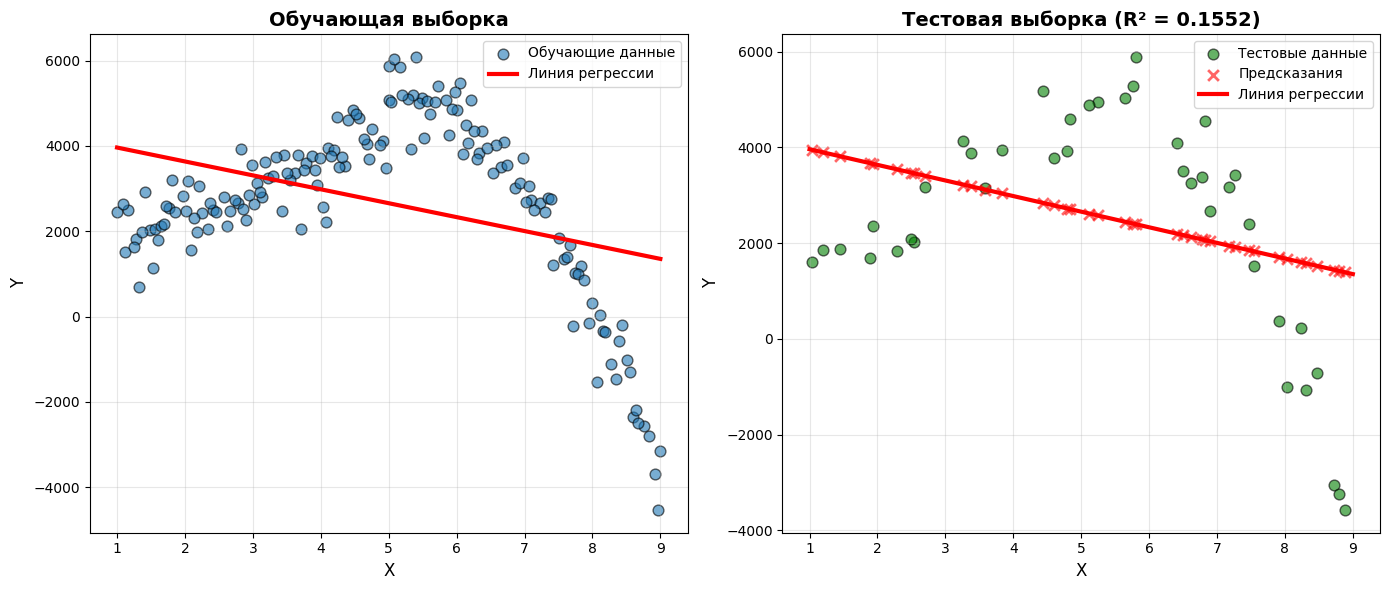

In [8]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = model.predict(X_range)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.6, label='Обучающие данные', s=60, edgecolors='k')
plt.plot(X_range, y_range, 'r-', linewidth=3, label='Линия регрессии')
plt.xlabel(X_column, fontsize=12)
plt.ylabel(Y_column, fontsize=12)
plt.title('Обучающая выборка', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.6, label='Тестовые данные', s=60, edgecolors='k', color='green')
plt.scatter(X_test, y_pred_test, alpha=0.6, label='Предсказания', s=60, marker='x', color='red', linewidths=2)
plt.plot(X_range, y_range, 'r-', linewidth=3, label='Линия регрессии')
plt.xlabel(X_column, fontsize=12)
plt.ylabel(Y_column, fontsize=12)
plt.title(f'Тестовая выборка (R² = {r2_test:.4f})', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

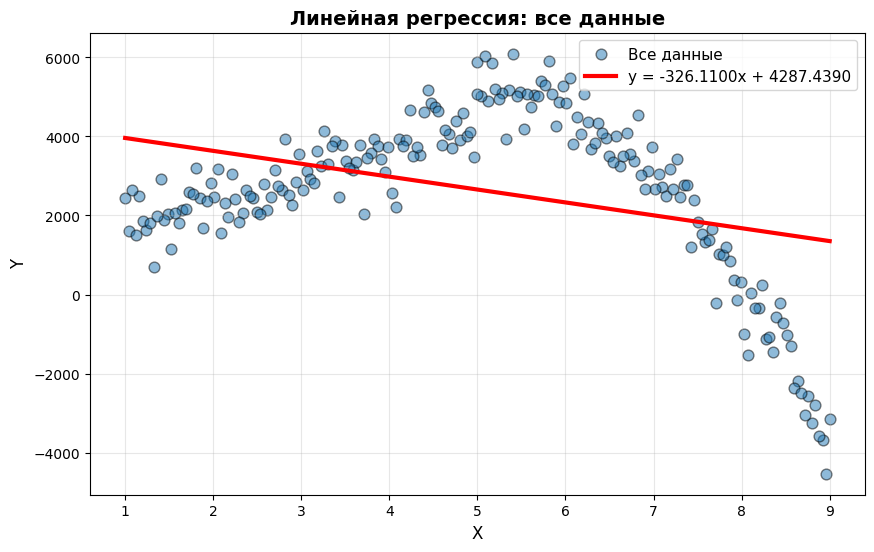

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, s=60, edgecolors='k', label='Все данные')
plt.plot(X_range, y_range, 'r-', linewidth=3, label=f'y = {a:.4f}x + {b:.4f}')
plt.xlabel(X_column, fontsize=12)
plt.ylabel(Y_column, fontsize=12)
plt.title('Линейная регрессия: все данные', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

### 9. График остатков (residuals)

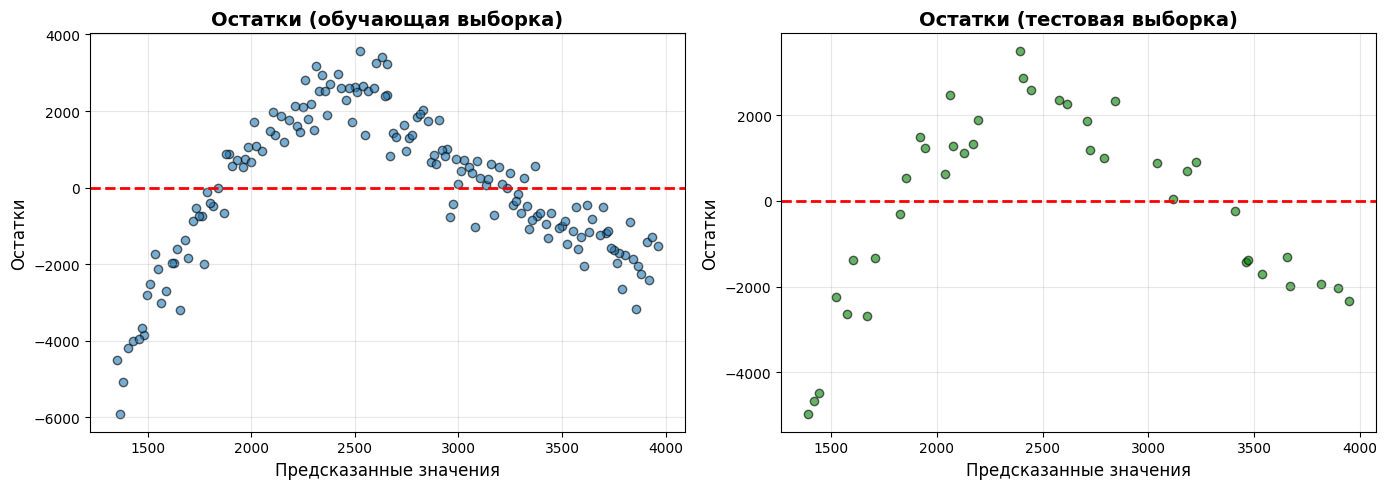

In [10]:
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Предсказанные значения', fontsize=12)
plt.ylabel('Остатки', fontsize=12)
plt.title('Остатки (обучающая выборка)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, residuals_test, alpha=0.6, edgecolors='k', color='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Предсказанные значения', fontsize=12)
plt.ylabel('Остатки', fontsize=12)
plt.title('Остатки (тестовая выборка)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Выводы

В данной лабораторной работе была построена модель линейной регрессии для анализа зависимости между переменными.

**Основные результаты:**
- Получена эмпирическая формула зависимости
- Проведена оценка качества модели с помощью метрик MSE, RMSE, MAE и R²
- Выполнена визуализация исходных данных и результатов регрессии
- Проанализированы остатки модели

**Качество модели:**
- Коэффициент детерминации R² показывает, какую долю вариации зависимой переменной объясняет модель
- Анализ остатков позволяет оценить адекватность модели
- Близость метрик на обучающей и тестовой выборках свидетельствует об отсутствии переобучения